## Part II: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('20210315_Housesigma_just_sold_final_combined.csv')

In [3]:
df.head()

,Listing_num,Address,Community,House_type,Listing_price,Sigma_estimate,Estimated_on,Sold_price,Bedroom,Washroom,...,Days_on_market,Rental_dom,Listed_on,Updated_on,Rental_estimate,Rental_yield,Major_intersection,Amenities,Exposure,Municipality
0,C5128526,Unit 602 - 38 Stewart St,Waterfront Communities C1 - Toronto,Condo Apt,599000,643747,2021-03-15 00:00:00,595000.0,1.00,1,...,18,31.0,2021-02-25 00:00:00,2021-03-15 00:00:00,1570.0,1.59,King St & Bathurst St,"Concierge, Exercise Room, Gym, Outdoor Pool, R...",S,Toronto
1,C5073554,Unit 321 - 633 Bay St,Bay Street Corridor - Toronto,Condo Apt,619900,639904,2021-03-15 00:00:00,603000.0,1.00,1,...,72,33.0,2021-01-02 00:00:00,2021-03-15 00:00:00,1946.0,1.68,Bay & Dundas,"Concierge, Exercise Room, Indoor Pool, Party/M...",N,Toronto
2,C5149549,Unit 3406 - 295 Adelaide St W,Waterfront Communities C1 - Toronto,Condo Apt,659000,689138,2021-03-15 00:00:00,721223.0,1.33,1,...,2,30.0,2021-03-12 00:00:00,2021-03-15 00:00:00,1844.0,1.81,Adelaide & John,"Gym, Indoor Pool, Party/Meeting Room, Sauna, S...",E,Toronto
3,C5143960,Unit 412 - 90 Trinity St,Moss Park - Toronto,Condo Apt,670000,707359,2021-03-15 00:00:00,670000.0,1.33,1,...,6,28.0,2021-03-08 00:00:00,2021-03-15 00:00:00,2400.0,2.46,Front & Parliament,"Bbqs Allowed, Exercise Room, Party/Meeting Roo...",NW,Toronto
4,C5133188,Unit 37 - 88 Carr St,Kensington-Chinatown - Toronto,Condo Townhouse,589000,679127,2021-03-15 00:00:00,709999.0,2.00,2,...,12,26.0,2021-03-02 00:00:00,2021-03-15 00:00:00,2650.0,3.18,North East Of Bathurst & Queen,"Bbqs Allowed, Security System",E,Toronto


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Listing_num         961 non-null    object 
 1   Address             961 non-null    object 
 2   Community           961 non-null    object 
 3   House_type          961 non-null    object 
 4   Listing_price       961 non-null    int64  
 5   Sigma_estimate      961 non-null    int64  
 6   Estimated_on        961 non-null    object 
 7   Sold_price          960 non-null    float64
 8   Bedroom             961 non-null    float64
 9   Washroom            961 non-null    int64  
 10  Parking             961 non-null    int64  
 11  Tax                 925 non-null    float64
 12  Property_type       961 non-null    object 
 13  Maintenance         932 non-null    float64
 14  Building_age        469 non-null    object 
 15  Size                959 non-null    float64
 16  Basement

In [5]:
df['Utility_incl'].unique()

array(['water,heat', 'water,hydro,heat', 'water', nan, 'heat', 'hydro'],
      dtype=object)

In [7]:
index = np.where(df['Utility_incl']=='heat')

In [ ]:
index

In [6]:
df['heat'] = 0
df['water'] = 0
df['hydro'] = 0

In [8]:
df['heat'].iloc[index] = 1

index_2 = np.where(df['Utility_incl']=='water,heat')
df['heat'].iloc[index_2] = 1
df['water'].iloc[index_2] = 1

index_3 = np.where(df['Utility_incl']=='water')
df['water'].iloc[index_3] = 1

index_4 = np.where(df['Utility_incl']=='water,hydro,heat')
df['heat'].iloc[index_4] = 1
df['water'].iloc[index_4] = 1
df['hydro'].iloc[index_4] = 1

index_5 = np.where(df['Utility_incl']=='hydro')
df['hydro'].iloc[index_5] = 1

index_6 = np.where(df['Utility_incl']=='water,hydro')
df['water'].iloc[index_4] = 1
df['hydro'].iloc[index_4] = 1

C:\Users\Hyeyeon\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [9]:
df[['water','hydro','heat']]

,water,hydro,heat
0,1,0,1
1,1,1,1
2,1,0,1
3,1,0,1
4,1,0,0
...,...,...,...
956,1,0,1
957,0,0,0
958,1,0,1
959,1,0,1


In [10]:
community_names = [i.split(' - Toronto')[0] for i in df['Community'].unique()]

<AxesSubplot:ylabel='Address'>

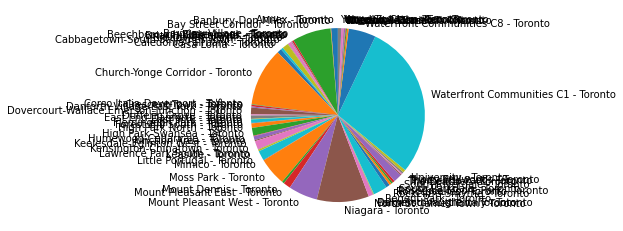

In [11]:
df.groupby('Community')['Address'].count().plot(kind='pie', startangle = 90, )

<AxesSubplot:xlabel='House_type'>

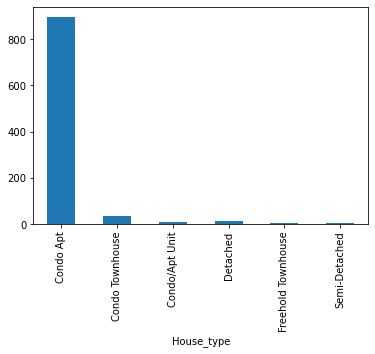

In [12]:
df.groupby('House_type')['Address'].count().plot(kind='bar')

In [13]:
index = np.where(df['House_type']=='Condo/Apt Unit')[0]
df['House_type'].iloc[index] = 'Condo Apt'

C:\Users\Hyeyeon\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
indices = np.where((df.House_type =='Freehold Townhouse') |(df.House_type =='Co-Op Apt') | (df.House_type =='Co-Ownership Apt') |(df.House_type =='Duplex') | (df.House_type =='Other'))
df.drop(index = indices[0], inplace = True)

<AxesSubplot:xlabel='Bedroom'>

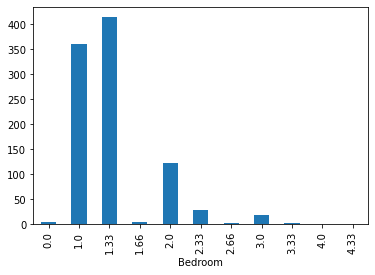

In [15]:
df.groupby('Bedroom')['Address'].count().plot(kind='bar')

<AxesSubplot:xlabel='Exposure'>

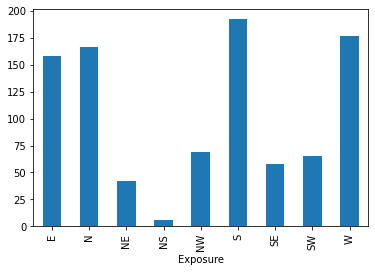

In [16]:
df.groupby('Exposure')['Address'].count().plot(kind='bar')

In [17]:
index = np.where((df['Exposure']=='NS' )| (df['Exposure']=='EW'))[0]
df['Exposure'].iloc[index] = np.NaN

In [18]:
df['Exposure'].iloc[index]

494    NaN
647    NaN
750    NaN
751    NaN
903    NaN
906    NaN
Name: Exposure, dtype: object

In [19]:
df['Municipality'].nunique()

1

In [20]:
df.drop(columns=['Listing_num', 'Address', 'Estimated_on', 'Rental_dom', 'Rental_estimate',\
                 'Rental_yield', 'Property_type', 'Building_age', \
                 'Basement','Utility_incl', 'Listed_on', 'Updated_on', \
                 'Major_intersection', 'Amenities', 'Municipality'], inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 960
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Community       958 non-null    object 
 1   House_type      958 non-null    object 
 2   Listing_price   958 non-null    int64  
 3   Sigma_estimate  958 non-null    int64  
 4   Sold_price      957 non-null    float64
 5   Bedroom         958 non-null    float64
 6   Washroom        958 non-null    int64  
 7   Parking         958 non-null    int64  
 8   Tax             922 non-null    float64
 9   Maintenance     932 non-null    float64
 10  Size            956 non-null    float64
 11  Days_on_market  958 non-null    int64  
 12  Exposure        927 non-null    object 
 13  heat            958 non-null    int64  
 14  water           958 non-null    int64  
 15  hydro           958 non-null    int64  
dtypes: float64(5), int64(8), object(3)
memory usage: 127.2+ KB


### Fill NA 
Fill NA with an mean value of its bedroom size

In [22]:
df.groupby('Bedroom')[['Size']].mean()

,Size
Bedroom,
0.00,275.000000
1.00,482.227778
1.33,607.155340
1.66,820.000000
2.00,754.455285
2.33,832.142857
2.66,1100.000000
3.00,1080.777778
3.33,1300.000000


In [23]:
# Estimating Size by the number of bedroom
df['Size'] = df['Size'].fillna(df.groupby('Bedroom')['Size'].transform('mean'))

In [24]:
df.groupby('Size')['Community'].count()

Size
0.00000        47
448.00000       1
500.00000     274
510.00000       1
512.00000       1
533.00000       1
545.00000       1
570.00000       1
580.00000       1
600.00000     350
607.15534       2
609.00000       1
621.00000       1
625.00000       1
646.00000       1
650.00000       1
670.00000       1
677.00000       1
700.00000     149
755.00000       1
782.00000       1
800.00000      56
815.00000       1
900.00000      21
950.00000       1
1000.00000     24
1004.00000      1
1200.00000      8
1300.00000      5
1400.00000      3
Name: Community, dtype: int64

In [25]:
bins = [0, 500, 600, 700, 800, 900, 1000, 1100, 1500]
df['Size_cat'] = pd.cut(df['Size'], bins=bins, right = False, include_lowest = True)

In [26]:
df.groupby('Size_cat')['Community'].count()

Size_cat
[0, 500)         48
[500, 600)      280
[600, 700)      359
[700, 800)      151
[800, 900)       57
[900, 1000)      22
[1000, 1100)     25
[1100, 1500)     16
Name: Community, dtype: int64

In [27]:
sum(df['Size_cat'].isna())

0

### Fill NA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958 entries, 0 to 960
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Community       958 non-null    object  
 1   House_type      958 non-null    object  
 2   Listing_price   958 non-null    int64   
 3   Sigma_estimate  958 non-null    int64   
 4   Sold_price      957 non-null    float64 
 5   Bedroom         958 non-null    float64 
 6   Washroom        958 non-null    int64   
 7   Parking         958 non-null    int64   
 8   Tax             922 non-null    float64 
 9   Maintenance     932 non-null    float64 
 10  Size            958 non-null    float64 
 11  Days_on_market  958 non-null    int64   
 12  Exposure        927 non-null    object  
 13  heat            958 non-null    int64   
 14  water           958 non-null    int64   
 15  hydro           958 non-null    int64   
 16  Size_cat        958 non-null    category
dtypes: category(1), 

In [29]:
df.groupby('Size_cat')[['Tax', 'Maintenance']].mean()

,Tax,Maintenance
Size_cat,,
"[0, 500)",2080.288889,345.042553
"[500, 600)",2197.839695,411.625899
"[600, 700)",2322.500000,484.427762
"[700, 800)",2424.046980,577.554054
"[800, 900)",2513.781818,632.596491
"[900, 1000)",2545.000000,760.214286
"[1000, 1100)",2197.400000,797.083333
"[1100, 1500)",2184.500000,694.272727


In [30]:
# Estimating Tax & Maintenance by the Size
df['Tax'] = df['Tax'].fillna(df.groupby('Size_cat')['Tax'].transform('mean'))
df['Maintenance'] = df['Maintenance'].fillna(df.groupby('Size_cat')['Maintenance'].transform('mean'))

In [31]:
sum(df['Exposure'].isna())

31

In [32]:
df['Exposure'].value_counts()/df['Exposure'].count()

S     0.207120
W     0.190939
N     0.179072
E     0.170442
NW    0.074434
SW    0.070119
SE    0.062567
NE    0.045307
Name: Exposure, dtype: float64

In [33]:
exposure_freq = pd.Series(df['Exposure'].value_counts()/df['Exposure'].count())
exposure_freq

S     0.207120
W     0.190939
N     0.179072
E     0.170442
NW    0.074434
SW    0.070119
SE    0.062567
NE    0.045307
Name: Exposure, dtype: float64

In [34]:
exposure_freq.index

Index(['S', 'W', 'N', 'E', 'NW', 'SW', 'SE', 'NE'], dtype='object')

In [35]:
import random

In [36]:
random_choices = random.choices(exposure_freq.index, weights = exposure_freq, k = sum(df['Exposure'].isna()))

In [37]:
random_choices

['S',
 'N',
 'SE',
 'N',
 'N',
 'S',
 'W',
 'W',
 'NE',
 'W',
 'N',
 'W',
 'W',
 'NW',
 'W',
 'S',
 'SW',
 'W',
 'S',
 'N',
 'N',
 'E',
 'W',
 'W',
 'SE',
 'SW',
 'N',
 'E',
 'S',
 'NW',
 'S']

In [38]:
df[df['Exposure'].isnull()].index

Int64Index([  9,  32,  78,  98, 150, 201, 299, 350, 410, 429, 435, 441, 493,
            494, 516, 526, 536, 561, 566, 647, 654, 685, 688, 750, 751, 832,
            878, 903, 906, 931, 933],
           dtype='int64')

In [39]:
null_index = np.where(df['Exposure'].isnull())[0]

In [40]:
for i in range(len(null_index)):
    df['Exposure'].iloc[null_index[i]]=random_choices[i]

C:\Users\Hyeyeon\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [41]:
sum(df['Exposure'].isna())

0

In [42]:
df.dropna(inplace = True) # drops the Sold-price na row

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 960
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Community       957 non-null    object  
 1   House_type      957 non-null    object  
 2   Listing_price   957 non-null    int64   
 3   Sigma_estimate  957 non-null    int64   
 4   Sold_price      957 non-null    float64 
 5   Bedroom         957 non-null    float64 
 6   Washroom        957 non-null    int64   
 7   Parking         957 non-null    int64   
 8   Tax             957 non-null    float64 
 9   Maintenance     957 non-null    float64 
 10  Size            957 non-null    float64 
 11  Days_on_market  957 non-null    int64   
 12  Exposure        957 non-null    object  
 13  heat            957 non-null    int64   
 14  water           957 non-null    int64   
 15  hydro           957 non-null    int64   
 16  Size_cat        957 non-null    category
dtypes: category(1), 